# Normalizer comparison

In [1]:
# Imports...

import getpass
import h5py
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import pandas as pd
import pickle

from tqdm import tqdm

# Size of plots
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
# Change presentation settings

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8.0, 5.0)
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 14

color_palette = {"Indigo": {
                    50: "#E8EAF6",
                    100: "#C5CAE9",
                    200: "#9FA8DA",
                    300: "#7986CB",
                    400: "#5C6BC0",
                    500: "#3F51B5",
                    600: "#3949AB",
                    700: "#303F9F",
                    800: "#283593",
                    900: "#1A237E"},
                 "Teal": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"}
                }

line_styles = [(0, ()), (0, (1, 3)), (0, (3, 2))]

In [3]:
# Make ROC_curve

from sklearn.metrics import auc, roc_curve, roc_auc_score                          

def get_roc_curve(label, scores, names, colors, title):
    """Generates ROC Curves for a given array"""
    fig, ax = plt.subplots()

    for i in range(len(scores)):
        fpr, tpr, thresholds = roc_curve(label, scores[i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr,
                 tpr,
                 linewidth=3,
                 color=colors[i],
                 linestyle=line_styles[0],
                 label=("%s AUC: %s" % (names[i], roc_auc)))
        
    plt.legend(frameon=False)
    plt.ylabel("Sensitivity (TPR)")
    plt.xlabel("Fall-out (TNR)")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.title(title)
    plt.show();

In [4]:
files_dir = './normalizer_comp_files/'

ae_scores = pickle.load(open(files_dir + "ae_scores.p", "rb"))
ms_scores = pickle.load(open(files_dir + "ms_scores.p", "rb"))
rf_scores = pickle.load(open(files_dir + "rf_scores.p", "rb"))
true_labels = pickle.load(open(files_dir + "true_labels.p", "rb"))
inliers = pickle.load(open(files_dir + "inliers.p", "rb"))
outliers = pickle.load(open(files_dir + "outliers.p", "rb"))

In [5]:
normalizer_names = ["StandardScaler", 
                    "MinMaxScaler", 
                    "MaxAbsScaler", 
                    "RobustScaler", 
                    "Normalizer",
                    "QuantileTransformer (uniform)",
                    "QuantileTransformer (normal)"]
names = ["Autoencoder", "Mean square", "Random forest"]
colors = [color_palette["Teal"][400], color_palette["Indigo"][100], color_palette["Indigo"][700]]

In [6]:
print("Good lumis:", inliers[0])
print("Bad lumis:", outliers[0])
print("Ratio of bad lumis:", outliers[0]/len(true_labels[0]))

Good lumis: 145494
Bad lumis: 1822
Ratio of bad lumis: 0.0123679708925


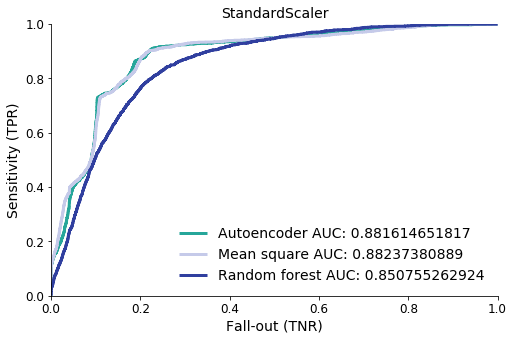

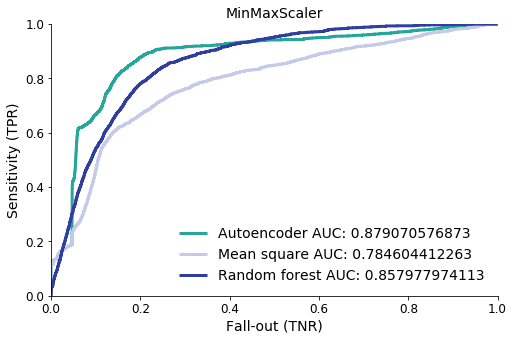

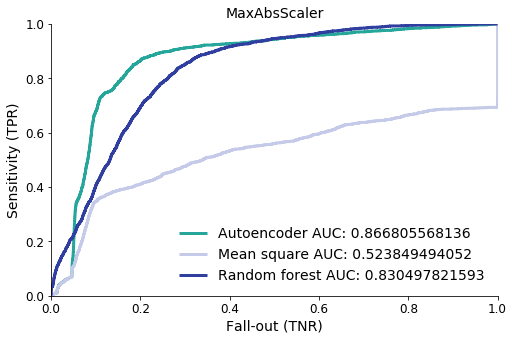

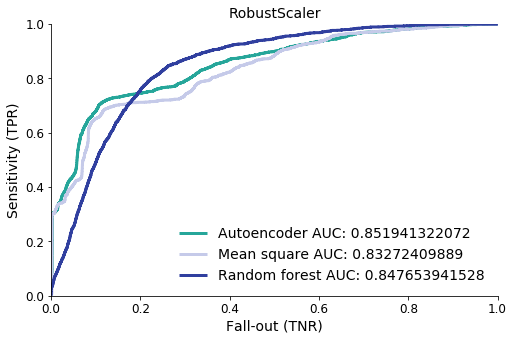

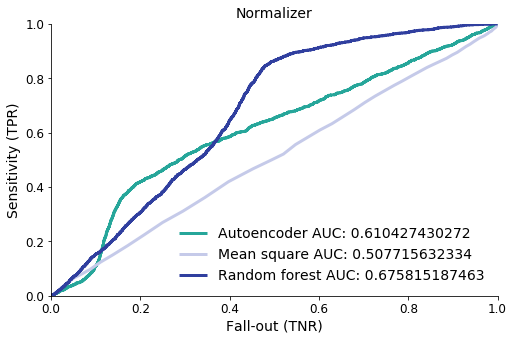

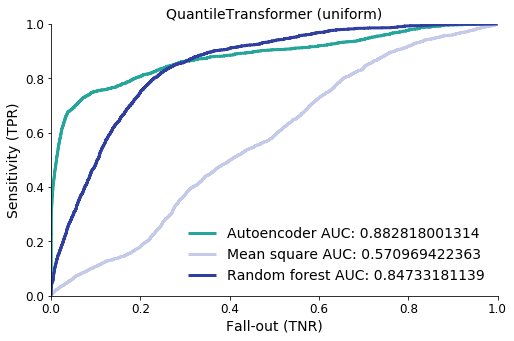

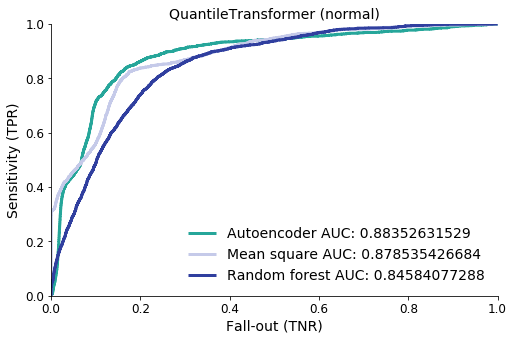

In [7]:
for i in range(len(true_labels)):
    get_roc_curve(true_labels[i], [ae_scores[i], ms_scores[i], rf_scores[i]], names, colors, normalizer_names[i])

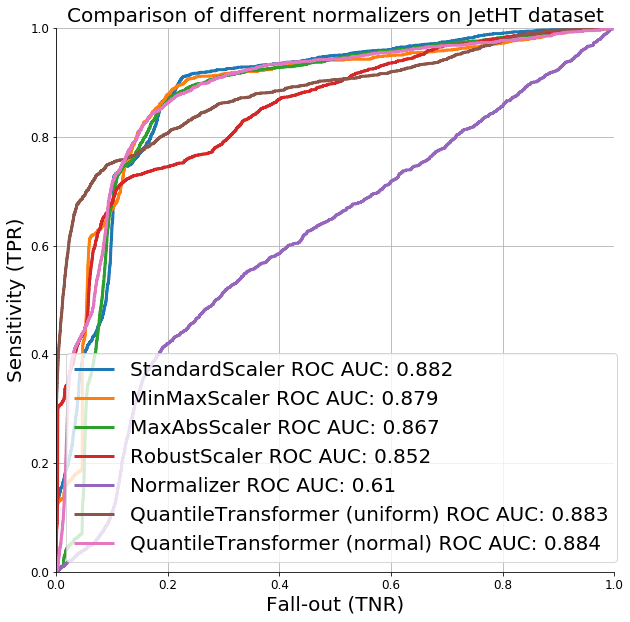

In [44]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 32
plt.rcParams.update({'font.size': 22})

for i in range(len(true_labels)):
    fpr, tpr, thresholds = roc_curve(true_labels[i], ae_scores[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             linewidth=3,
#              color=colors[i],
             linestyle=line_styles[0],
             label=("%s ROC AUC: %s" % (normalizer_names[i], round(roc_auc, 3))))
        
plt.legend(prop={'size': 20})
plt.ylabel("Sensitivity (TPR)", fontsize=20)
plt.xlabel("Fall-out (TNR)", fontsize=20)
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.grid()
plt.title('Comparison of different normalizers on JetHT dataset', fontsize=20)
plt.show();